## Affine Transformation
In this task we were asked to do affine transformation which include:
1. Scalling
2. Rotation
3. Translation
4. Projective

Fist we might want to make a function that draws/displays our points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import string

In [2]:
# attempt to make a function that draws all of the points given by the transformation functions and connect them with line
# x_coordinates = [1, 2, 3, 2, 1]
# y_coordinates = [1, 2, 1, 1, 1]
# plt.scatter(x_coordinates, y_coordinates)
# plt.plot(x_coordinates, y_coordinates)

In [3]:
def draw_points(points, title) :
    plt.figure()
    axes = plt.gca()
    
    x_coordinates = []
    y_coordinates = []
    alphabet = list(string.ascii_lowercase)
    
    i = 0
    for point in points : 
        x, y, k = point
        x_coordinates.append(x)
        y_coordinates.append(y)
        plt.annotate(alphabet[i], (x, y))
        i += 1
    
    x_coordinates.append(x_coordinates[0]) # because we want the last and the first point to be connected
    y_coordinates.append(y_coordinates[0]) # because we want the last and the first point to be connected
    
    plt.scatter(x_coordinates, y_coordinates)
    plt.plot(x_coordinates, y_coordinates)
    axes.set_xticks(np.arange(-8, 7, 1))
    axes.set_yticks(np.arange(-5, 7, 1))
    axes.set_aspect('equal')
    plt.title(title)
    plt.grid()

In [4]:
# Draw/display our first square

# points
# We use homogeneous coordinates
# The third coordinate is what people called intensity, it is usually either 1 or 0
# Homogeneous coordinate is what we use for translation transformation. More on this is in the readme file
a = (-2, 2, 1)
b = (2, 2, 1)
c = (2, -2, 1) # notice that i put a negative coordinate there
d = (-2, -2, 1) # this would make a difference when we do scalling transformation (simply to make it scale from the center)

# matrix with rows of points
square_matrix = np.array([a, b, c, d])

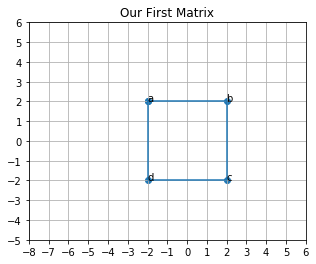

In [5]:
draw_points(square_matrix, 'Our First Matrix')

In [6]:
def scalling(matrix, sx, sy) :
    """Do scalling transformation to the given input matrix
    
    Parameters
    ----------
    matrix : numpy array
        The input matrix, a set of points
    sx : int
        amount of 'x' scalling done to the input matrix
    sy : int
        amount of 'y' scalling done to the input matrix
        
    Returns
    -------
    numpy array
        matrix contains a set of points that have been scalled
    """

    # the formula for scalling is as simple as
    # x' = x * sx
    # y' = y * sy
    # therefore our matrix representation of this formula would be:
    scalling_matrix = np.array([[sx, 0, 0], 
                               [0, sy, 0], 
                               [0, 0, 1]])
    
    result = []
    for point in matrix :
        scalled_point = scalling_matrix @ point
        result.append(scalled_point)
        
    return np.array(result)

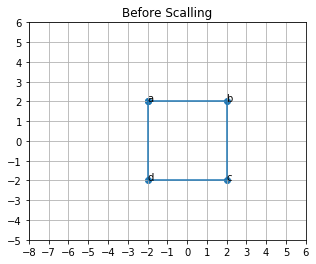

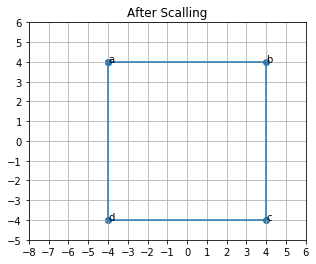

In [7]:
draw_points(square_matrix, 'Before Scalling')
scalled_square = scalling(square_matrix, 2, 2)
draw_points(scalled_square, 'After Scalling')

In [8]:
def rotation(matrix, r) :
    """Do a rotation transformation to the given input matrix
    
    counter-clockwise
    
    Parameters
    ----------
    matrix : numpy array
        The input matrix, a set of points
    r : int
        amount of radiant (eg. pi, pi/2, pi/4)
        or basically a theta
        
    Returns
    -------
    numpy array
        matrix contains a set of points that have been rotated
    """

    sin = np.sin(r)
    cos = np.cos(r)
    
    # the formula for rotation is
    # x' = x*cos(theta) - y*sin(theta)
    # y' = x*sin(theta) + y*cos(theta)
    # therefore our matrix representation of this formula would be:
    rotation_matrix = np.array([[cos, -sin, 0], 
                                [sin, cos, 0], 
                                [0, 0, 1]])
    
    result = []
    for point in matrix :
        rotated_point = rotation_matrix @ point
        result.append(rotated_point)
        
    return np.array(result)

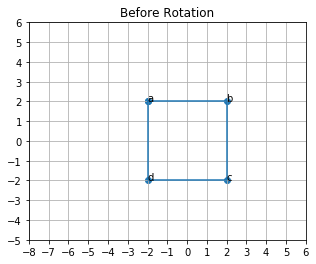

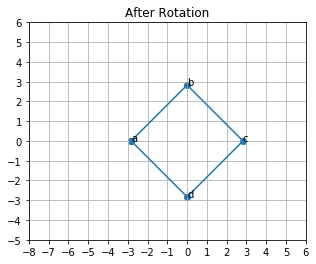

In [9]:
draw_points(square_matrix, 'Before Rotation')
rotated_matrix = rotation(square_matrix, np.pi/4) # 
draw_points(rotated_matrix, 'After Rotation')

In [25]:
def shear(matrix, hs, vs) :
    """Do a shear transformation to the given input matrix
    
    Parameters
    ----------
    matrix : numpy array
        The input matrix, a set of points
    hs : int
        horizontal shear
    vs : int
        vertical shear    
    
    Returns
    -------
    numpy array
        matrix contains a set of points that have been rotated
    """
    shear_matrix = np.array([[1, hs, 0], 
                             [vs, 1, 0], 
                             [0, 0, 1]])
    
    result = []
    for point in matrix :
        sheared_point = shear_matrix @ point
        result.append(sheared_point)
        
    return np.array(result)

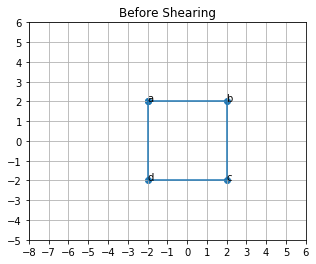

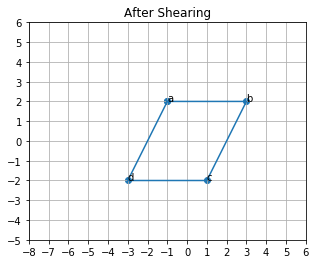

In [34]:
draw_points(square_matrix, 'Before Shearing')
sheared_matrix = shear(square_matrix, 0.5, 0) # 
draw_points(sheared_matrix, 'After Shearing')

In [10]:
def translation(matrix, tx, ty) :
    """Do a translation transformation to the given input matrix
    
    Parameters
    ----------
    matrix : numpy array
        The input matrix, a set of points
    tx : int
        amount of x translation
    ty : int
        amount of y translation
        
    Returns
    -------
    numpy array
        matrix contains a set of points that has been translated
    """
    
    # the formula for translation is
    # x' = x + tx
    # y' = y + ty
    # therefore our matrix representation of this formula would be:
    translation_matrix = np.array([[1, 0, tx], 
                                   [0, 1, ty], 
                                   [0, 0, 1]])
    
    result = []
    for point in matrix :
        translated_point = translation_matrix @ point
        result.append(translated_point)
        
    return np.array(result)

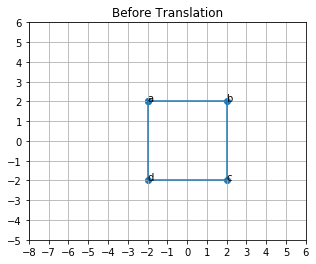

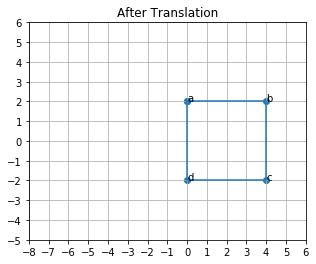

In [11]:
draw_points(square_matrix, 'Before Translation')
translated_matrix = translation(square_matrix, 2, 0) # 
draw_points(translated_matrix, 'After Translation')

In [32]:
def affine(matrix, tx=0, ty=0, sx=1, sy=1, hs=0, vs=0, radian=0) :
    """Do an affine transformation to the given matrix
    
    affine transformation is basically a combination of linear transformation
    (rotation, scalling, etc.) and translation
    
    Parameters
    ----------
    matrix : numpy array
        The input matrix, a set of points
    tx : int
        amount of x translation
    ty : int
        amount of y translation
        
    Returns
    -------
    numpy array
        matrix contains a set of points that has been transfromed
    """
    
    sin = np.sin(radian)
    cos = np.cos(radian)
    
    scalling_matrix = np.array([[sx, 0, 0], 
                               [0, sy, 0], 
                               [0, 0, 1]])
    rotation_matrix = np.array([[cos, -sin, tx], 
                                [sin, cos, ty], 
                                [0, 0, 1]])
    shear_matrix = np.array([[1, hs, 0], 
                             [vs, 1, 0], 
                             [0, 0, 1]])
    translation_matrix = np.array([[1, 0, tx], 
                                   [0, 1, ty], 
                                   [0, 0, 1]])
    
    affine_matrix = scalling_matrix @ rotation_matrix @ shear_matrix @ translation_matrix
    
    result = []
    for point in matrix :
        output_point = affine_matrix  @ point
        result.append(output_point)
        
    return np.array(result)

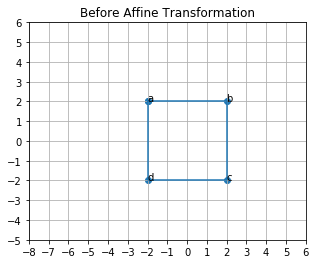

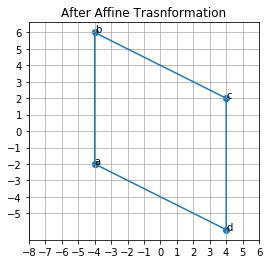

In [38]:
draw_points(square_matrix, 'Before Affine Transformation')
affine_transformation = affine(square_matrix, tx=0, ty=0, sx=2, sy=2, hs=0.5, radian=np.pi/2) 
draw_points(affine_transformation, 'After Affine Trasnformation')

In [45]:
def projective(matrix, tx=1, ty=1, sx=1, sy=1, hs=0, vs=0, radian=0, p1=0, p2=0) :
    """Do a projective transformation to the given matrix
    
    projective transformation is basically a combination of affine transformation
    and projective warp
    
    Parameters
    ----------
    matrix : numpy array
        The input matrix, a set of points
    tx : int
        amount of x translation
    ty : int
        amount of y translation
    sx : int
        amount of 'x' scalling done to the input matrix
    sy : int
        amount of 'y' scalling done to the input matrix
    radian : int
        amount of radiant (eg. pi, pi/2, pi/4)
        or basically a theta
    p1 : int
        projective transformation
    p2 : int
        projective transformation
        
    Returns
    -------
    numpy array
        matrix contains a set of points that has been transformed
    """
    
    sin = np.sin(radian)
    cos = np.cos(radian)
    
    scalling_matrix = np.array([[sx, 0, 0], 
                               [0, sy, 0], 
                               [0, 0, 1]])
    rotation_matrix = np.array([[cos, -sin, tx], 
                                [sin, cos, ty], 
                                [0, 0, 1]])
    shear_matrix = np.array([[1, hs, 0], 
                             [vs, 1, 0], 
                             [0, 0, 1]])
    translation_matrix = np.array([[1, 0, tx], 
                                   [0, 1, ty], 
                                   [0, 0, 1]])
    projective_matrix = np.array([[1, 0, 0], 
                                  [0, 1, 0], 
                                  [p1, p2, 1]])
    projective_matrix = scalling_matrix @ rotation_matrix @ shear_matrix @ translation_matrix @ projective_matrix
    
    result = []
    for point in matrix :
        projected_point = []
        x, y, w = projective_matrix @ point
        projected_point.append(x / w)
        projected_point.append(y / w)
        projected_point.append(w)
        result.append(projected_point)
        
    return np.array(result)

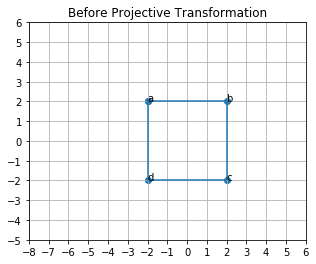

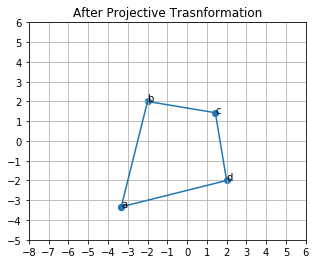

In [47]:
draw_points(square_matrix, 'Before Projective Transformation')
projective_transformation = projective(square_matrix, tx=0, ty=0, radian=np.pi/2, p1=0.1, p2=-0.1) 
draw_points(projective_transformation, 'After Projective Trasnformation')